

# Projet d'Analyse de Données USSI09 - Habitudes et Performance Académique des Étudiants

## Introduction

Ce notebook présente notre projet d'analyse de données réalisé dans le cadre du module USSI09 "Analyse de données" pour l'année 2024-2025. Nous nous intéressons à l'étude des relations entre les habitudes quotidiennes des étudiants et leur performance académique, un sujet particulièrement pertinent dans le contexte éducatif actuel.

## Équipe

- Alla Mohamed [@Mohamed-A2001](https://github.com/Mohamed-A2001)
- Planche Tom [@TomPlanche](https://github.com/Mohamed-A2001)

## Description du Dataset

Nous avons choisi d'analyser le dataset [Student Habits and Academic Performance](https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance) qui contient des données sur les habitudes quotidiennes des étudiants et leurs résultats académiques.

Ce dataset comporte:

- Nombre d'observations: 204 étudiants
- Nombre de variables: 18 variables
- Variables principales:
  - Variables démographiques: Age, Gender, Location
  - Habitudes d'étude: Study Hours, Sleep Hours, Exercise Frequency
  - Utilisation de la technologie: Technology Usage, Social Media Usage
  - Facteurs psychologiques: Stress Level, Anxiety Level
  - Performance académique: Academic Performance (GPA)

## Objectifs du projet

Notre analyse se structure autour de deux axes principaux:

1. **Analyse descriptive et exploratoire**:
   - Extraction de statistiques univariées pour comprendre la distribution des habitudes étudiantes et performances académiques
   - Analyse des relations entre variables (statistiques bivariées) pour identifier les corrélations entre habitudes et résultats
   - Analyse en Composantes Principales (ACP) pour réduire la dimensionnalité et identifier les facteurs principaux influençant la réussite académique
   - Visualisations pertinentes pour illustrer les relations découvertes

2. **Modélisation prédictive**:
   - Développement d'un modèle de régression linéaire pour prédire la performance académique (GPA) à partir des habitudes des étudiants
   - Évaluation des performances du modèle
   - Interprétation des résultats pour identifier les habitudes ayant le plus d'impact sur la réussite académique

## Méthodologie

Notre approche suit les étapes suivantes:

1. Chargement et nettoyage des données du dataset "Student Habits and Academic Performance"
2. Analyse exploratoire des données (EDA) pour comprendre les distributions et relations
3. Prétraitement des données pour l'analyse (standardisation, traitement des valeurs manquantes)
4. Analyse en Composantes Principales pour identifier les facteurs principaux influençant la performance académique
5. Modélisation par régression linéaire pour prédire le GPA des étudiants
6. Interprétation des résultats et identification des habitudes les plus déterminantes pour la réussite académique

## Plan du notebook

1. **Configuration de l'environnement et chargement des données**
2. **Nettoyage et préparation des données**
   - Traitement des valeurs manquantes
   - Encodage des variables catégorielles (Gender, Location, etc.)
   - Normalisation des variables numériques
3. **Analyse exploratoire des données**
   - Statistiques descriptives des habitudes étudiantes et performances
   - Visualisations des distributions (heures d'étude, sommeil, utilisation des médias sociaux)
4. **Statistiques bivariées et corrélations**
   - Corrélations entre les habitudes et la performance académique
   - Analyse des relations entre stress, anxiété et résultats
5. **Analyse en Composantes Principales**
   - Réduction de dimensionnalité
   - Identification des facteurs principaux
   - Visualisation des étudiants dans l'espace réduit
6. **Modélisation prédictive**
   - Régression linéaire pour prédire le GPA
   - Évaluation du modèle (RMSE, R²)
7. **Interprétation des résultats**
   - Identification des habitudes ayant le plus d'impact sur la performance
   - Recommandations basées sur l'analyse
8. **Conclusion et perspectives**

# 1. Configuration de l'environnement et chargement des données

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour les visualisations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)

# Chargement du dataset
data_path = "assets/enhanced_student_habits_performance_dataset.csv"
df = pd.read_csv(data_path)

df.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,Poor,3,Some College,High,6.0,Yes,4.00,5,5.8,No,0,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,Good,4,PhD,Low,6.8,No,4.00,7,5.8,No,5,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,Good,4,High School,Low,5.7,Yes,3.79,4,8.0,No,5,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,Fair,3,Master,Medium,8.5,Yes,4.00,6,4.6,No,3,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,Good,6,PhD,Low,9.2,No,4.00,4,5.7,No,2,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


# 2. Nettoyage et préparation des données

1. Transformations des données.

Des colonne ont des types `yes/no`, changeons les en 1/0.

In [2]:
# Colonnes à transformer ("Yes/No" -> 1/0
columns_to_transform = [
    "part_time_job",
    "extracurricular_participation",
    "dropout_risk",
    "access_to_tutoring"
]

# Transformation des données
for col in columns_to_transform:
    df[col] = df[col].map(lambda x: int(str(x).lower() == "yes"))

df.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,1,70.3,6.2,Poor,3,Some College,High,6.0,1,4.00,5,5.8,0,0,10.9,Co-Learning Group,1,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,0,88.4,7.2,Good,4,PhD,Low,6.8,0,4.00,7,5.8,0,5,8.3,Co-Learning Group,1,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,0,82.1,9.2,Good,4,High School,Low,5.7,1,3.79,4,8.0,0,5,8.0,Library,1,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,1,79.3,4.2,Fair,3,Master,Medium,8.5,1,4.00,6,4.6,0,3,11.7,Co-Learning Group,1,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,1,62.9,6.5,Good,6,PhD,Low,9.2,0,4.00,4,5.7,0,2,9.4,Quiet Room,1,Medium,9,1,10,Reading,7.1,98


2. Ajout de colonnes.

In [3]:
# On combine les temps d'écran
df["total_screen_time"] = df["social_media_hours"] + df["netflix_hours"]

df.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score,total_screen_time
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,1,70.3,6.2,Poor,3,Some College,High,6.0,1,4.00,5,5.8,0,0,10.9,Co-Learning Group,1,High,9,7,8,Reading,3.0,100,3.1
1,100001,28,Male,Arts,5.700000,0.5,0.4,0,88.4,7.2,Good,4,PhD,Low,6.8,0,4.00,7,5.8,0,5,8.3,Co-Learning Group,1,Low,7,2,10,Reading,6.0,99,0.9
2,100002,17,Male,Arts,2.400000,4.2,0.7,0,82.1,9.2,Good,4,High School,Low,5.7,1,3.79,4,8.0,0,5,8.0,Library,1,High,3,9,6,Kinesthetic,7.6,98,4.9
3,100003,27,Other,Psychology,3.400000,4.6,2.3,1,79.3,4.2,Fair,3,Master,Medium,8.5,1,4.00,6,4.6,0,3,11.7,Co-Learning Group,1,Low,5,3,10,Reading,3.2,100,6.9
4,100004,25,Female,Business,4.700000,0.8,2.7,1,62.9,6.5,Good,6,PhD,Low,9.2,0,4.00,4,5.7,0,2,9.4,Quiet Room,1,Medium,9,1,10,Reading,7.1,98,3.5


# 3. Extraction de statistiques décrivant les variables individuelles (statistiques univariées)

/var/folders/vd/zrxbzx1n27qf9qrhx1m5ysr40000gn/T/ipykernel_7236/3521514077.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, v, f'{rel_freq[j]:.1f}%', ha='center', va='bottom')
/var/folders/vd/zrxbzx1n27qf9qrhx1m5ysr40000gn/T/ipykernel_7236/3521514077.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, v, f'{rel_freq[j]:.1f}%', ha='center', va='bottom')
/var/folders/vd/zrxbzx1n27qf9qrhx1m5ysr40000gn/T/ipykernel_7236/3521514077.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

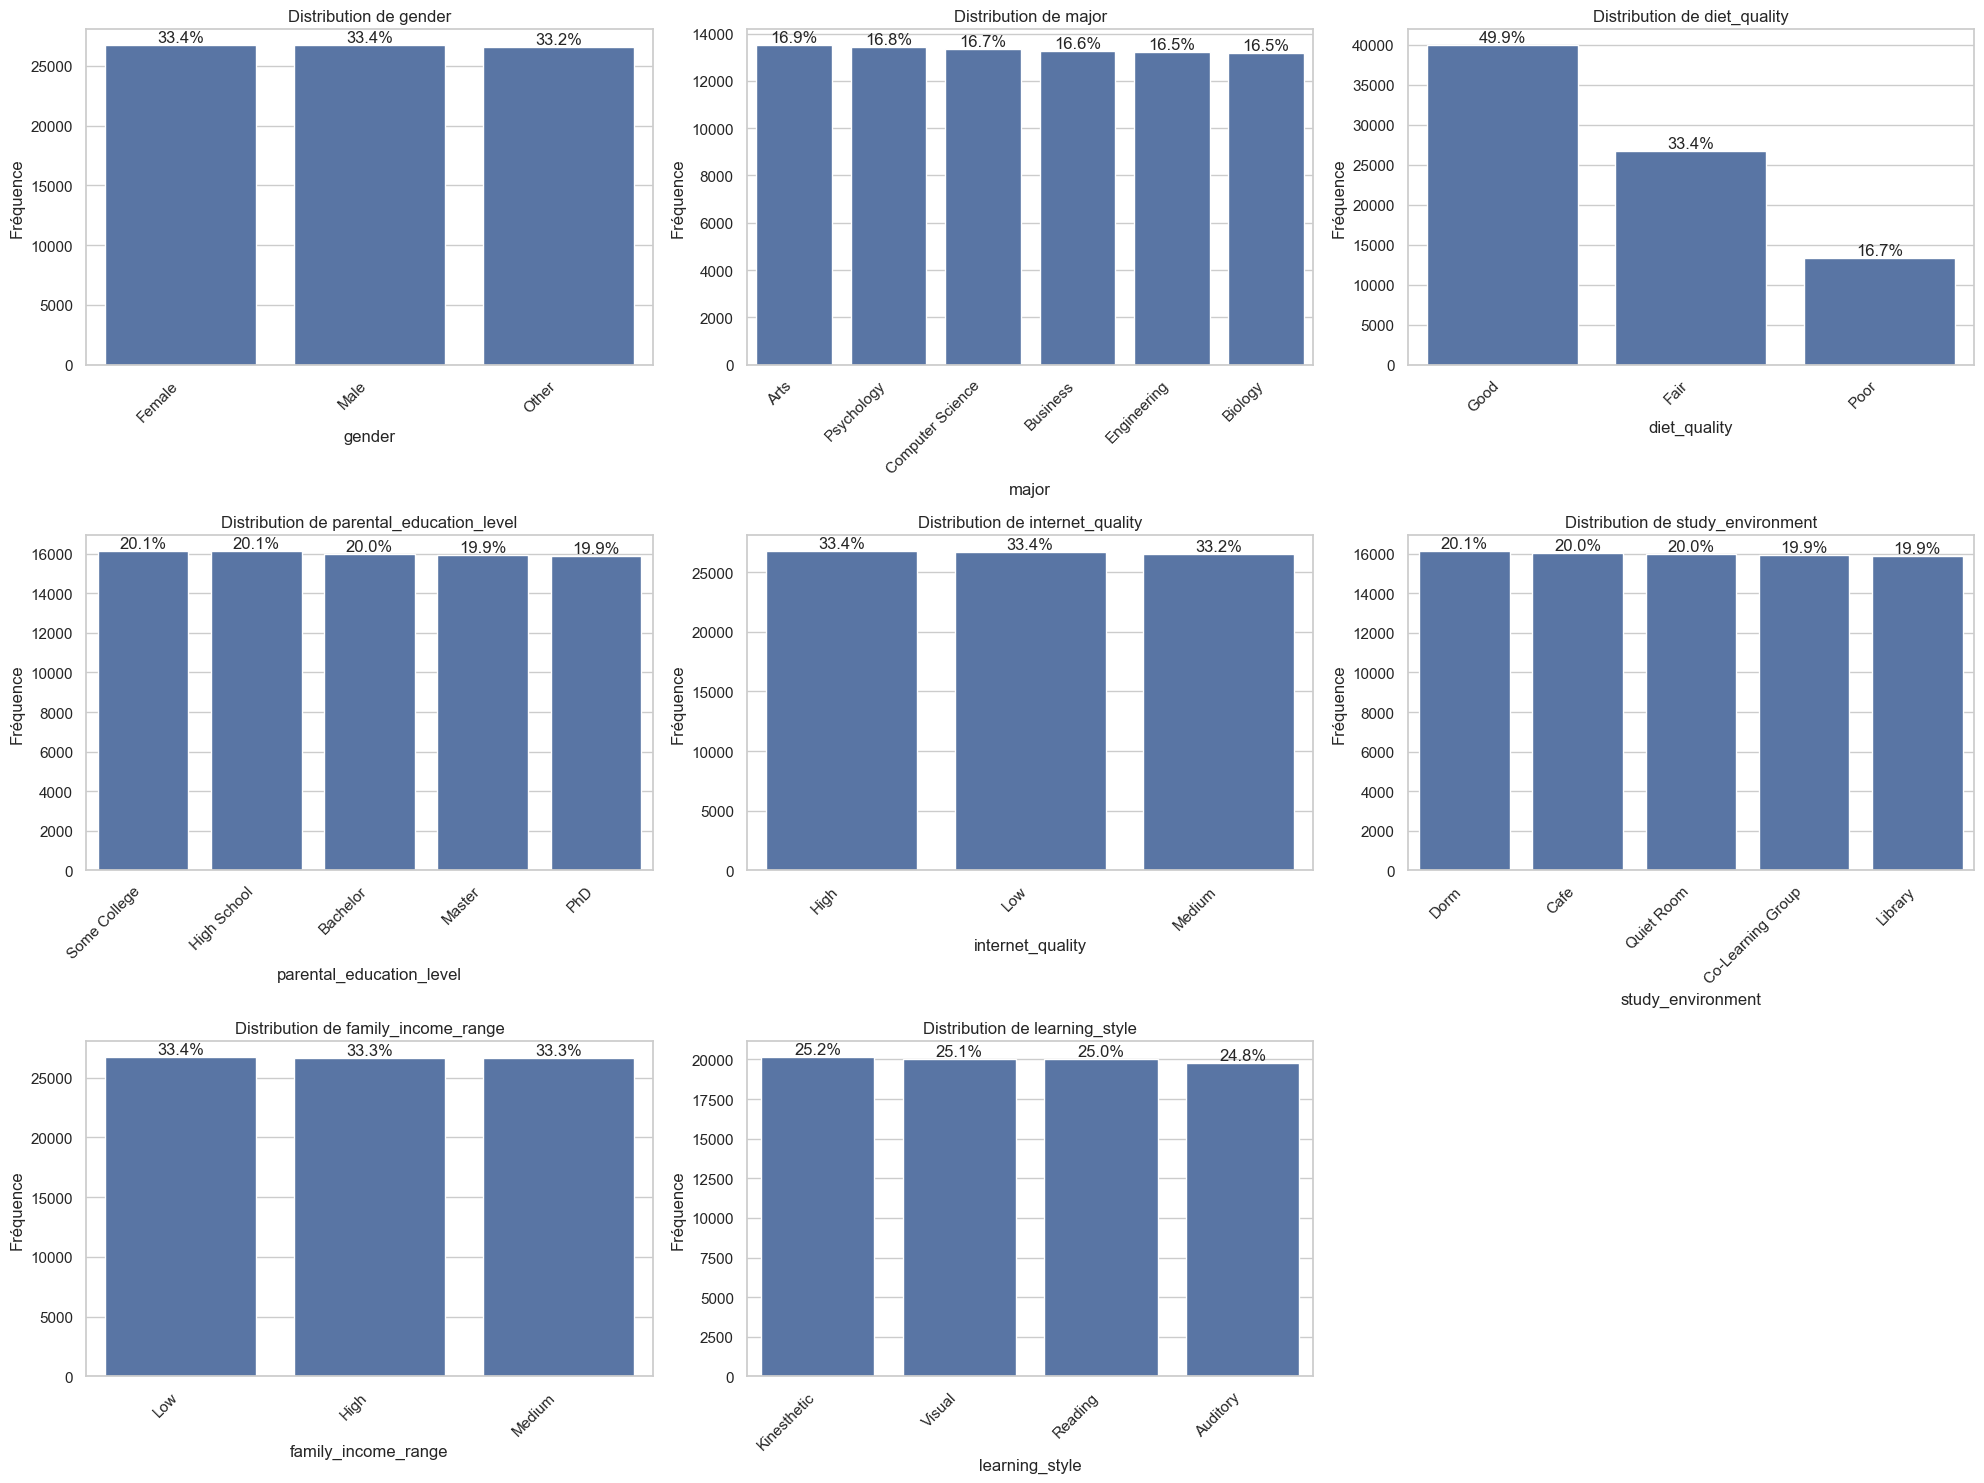


Statistiques pour gender:
        Fréquence  Pourcentage
gender                        
Female      26705     33.38125
Male        26698     33.37250
Other       26597     33.24625

Statistiques pour major:
                  Fréquence  Pourcentage
major                                   
Arts                  13505     16.88125
Psychology            13437     16.79625
Computer Science      13352     16.69000
Business              13276     16.59500
Engineering           13229     16.53625
Biology               13201     16.50125

Statistiques pour diet_quality:
              Fréquence  Pourcentage
diet_quality                        
Good              39935     49.91875
Fair              26713     33.39125
Poor              13352     16.69000

Statistiques pour parental_education_level:
                          Fréquence  Pourcentage
parental_education_level                        
Some College                  16115     20.14375
High School                   16106     20.13250
Bache

In [4]:
# 3.2 Analyse des variables qualitatives

# Liste des variables qualitatives
categorical_vars = ['gender', 'major', 'diet_quality', 'parental_education_level', 
                   'internet_quality', 'study_environment', 'family_income_range', 
                   'learning_style']

# Création d'une figure pour les diagrammes en barres
plt.figure(figsize=(20, 15))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    
    # Calcul des fréquences relatives
    freq = df[var].value_counts()
    rel_freq = df[var].value_counts(normalize=True) * 100
    
    # Création du diagramme en barres
    sns.barplot(x=freq.index, y=freq.values)
    plt.title(f'Distribution de {var}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Fréquence')
    
    # Ajout des pourcentages au-dessus des barres
    for j, v in enumerate(freq.values):
        plt.text(j, v, f'{rel_freq[j]:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Affichage des statistiques détaillées pour chaque variable
for var in categorical_vars:
    print(f"\nStatistiques pour {var}:")
    freq_table = pd.DataFrame({
        'Fréquence': df[var].value_counts(),
        'Pourcentage': df[var].value_counts(normalize=True) * 100
    })
    print(freq_table)


Statistiques descriptives pour les variables continues:
          study_hours_per_day  social_media_hours  netflix_hours  \
count                80000.00            80000.00       80000.00   
mean                     4.17                2.50           2.00   
std                      2.00                1.45           1.16   
min                      0.00                0.00           0.00   
25%                      2.80                1.20           1.00   
50%                      4.13                2.50           2.00   
75%                      5.50                3.80           3.00   
max                     12.00                5.00           4.00   
skewness                 0.14                0.00           0.00   
kurtosis                -0.23               -1.20          -1.20   

          attendance_percentage  sleep_hours  mental_health_rating  \
count                  80000.00     80000.00              80000.00   
mean                      69.97         7.02           

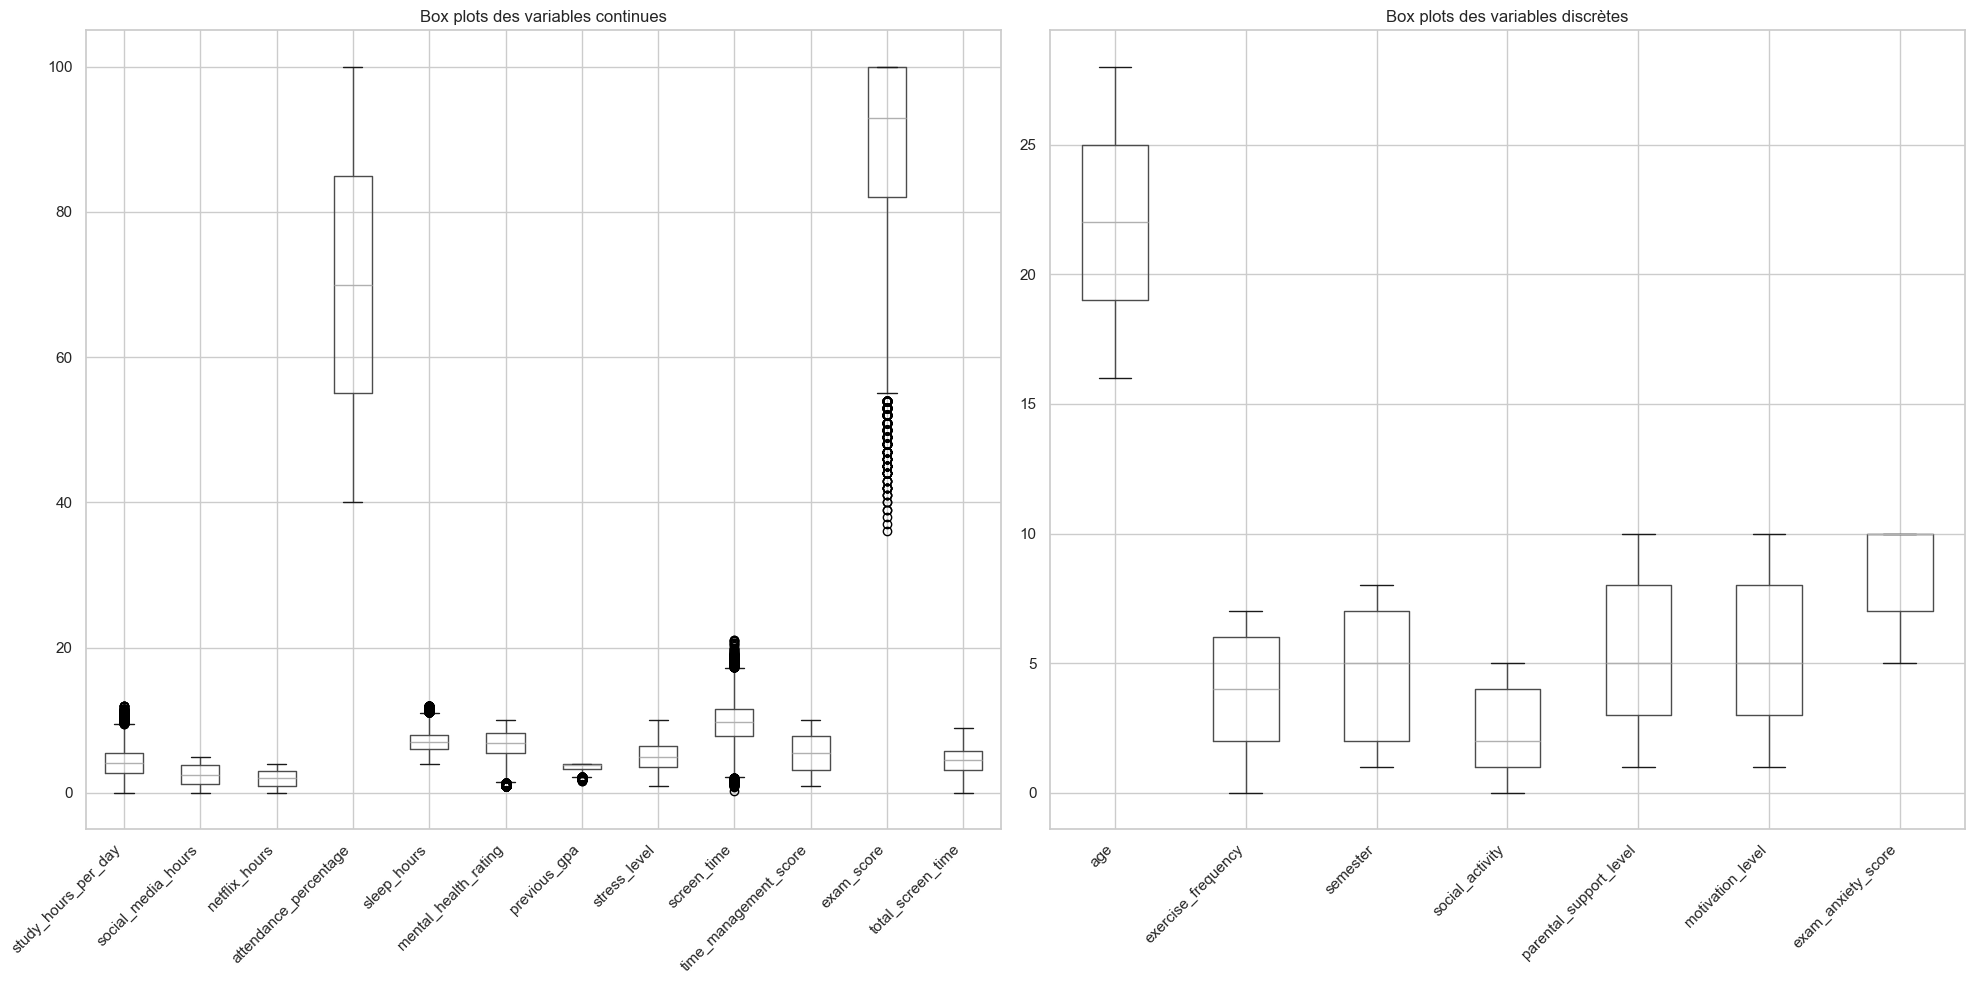

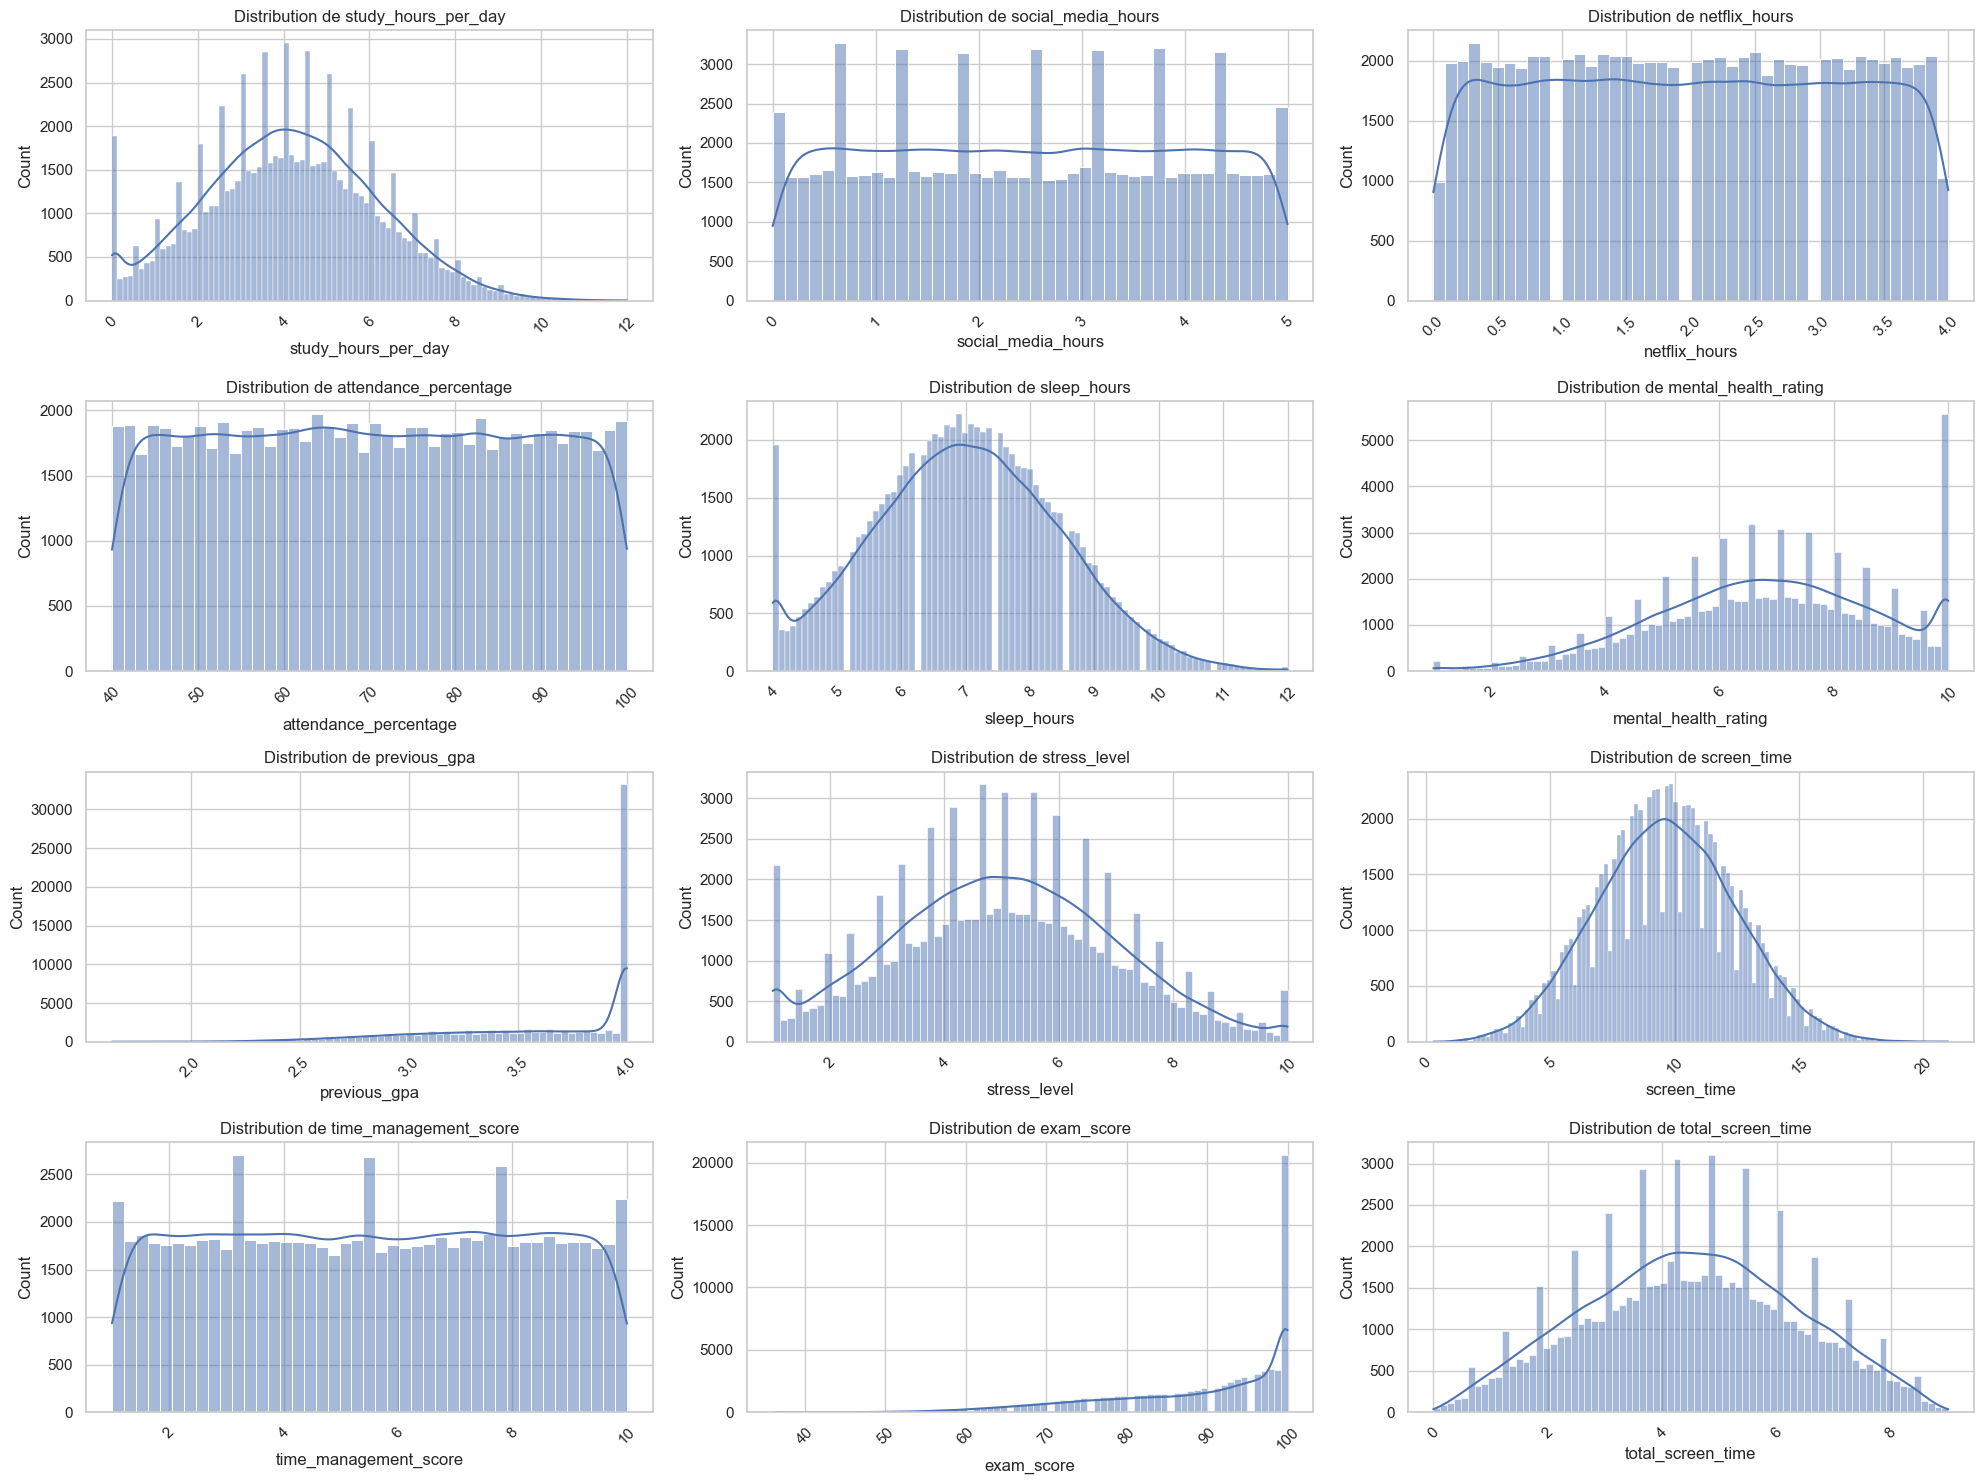

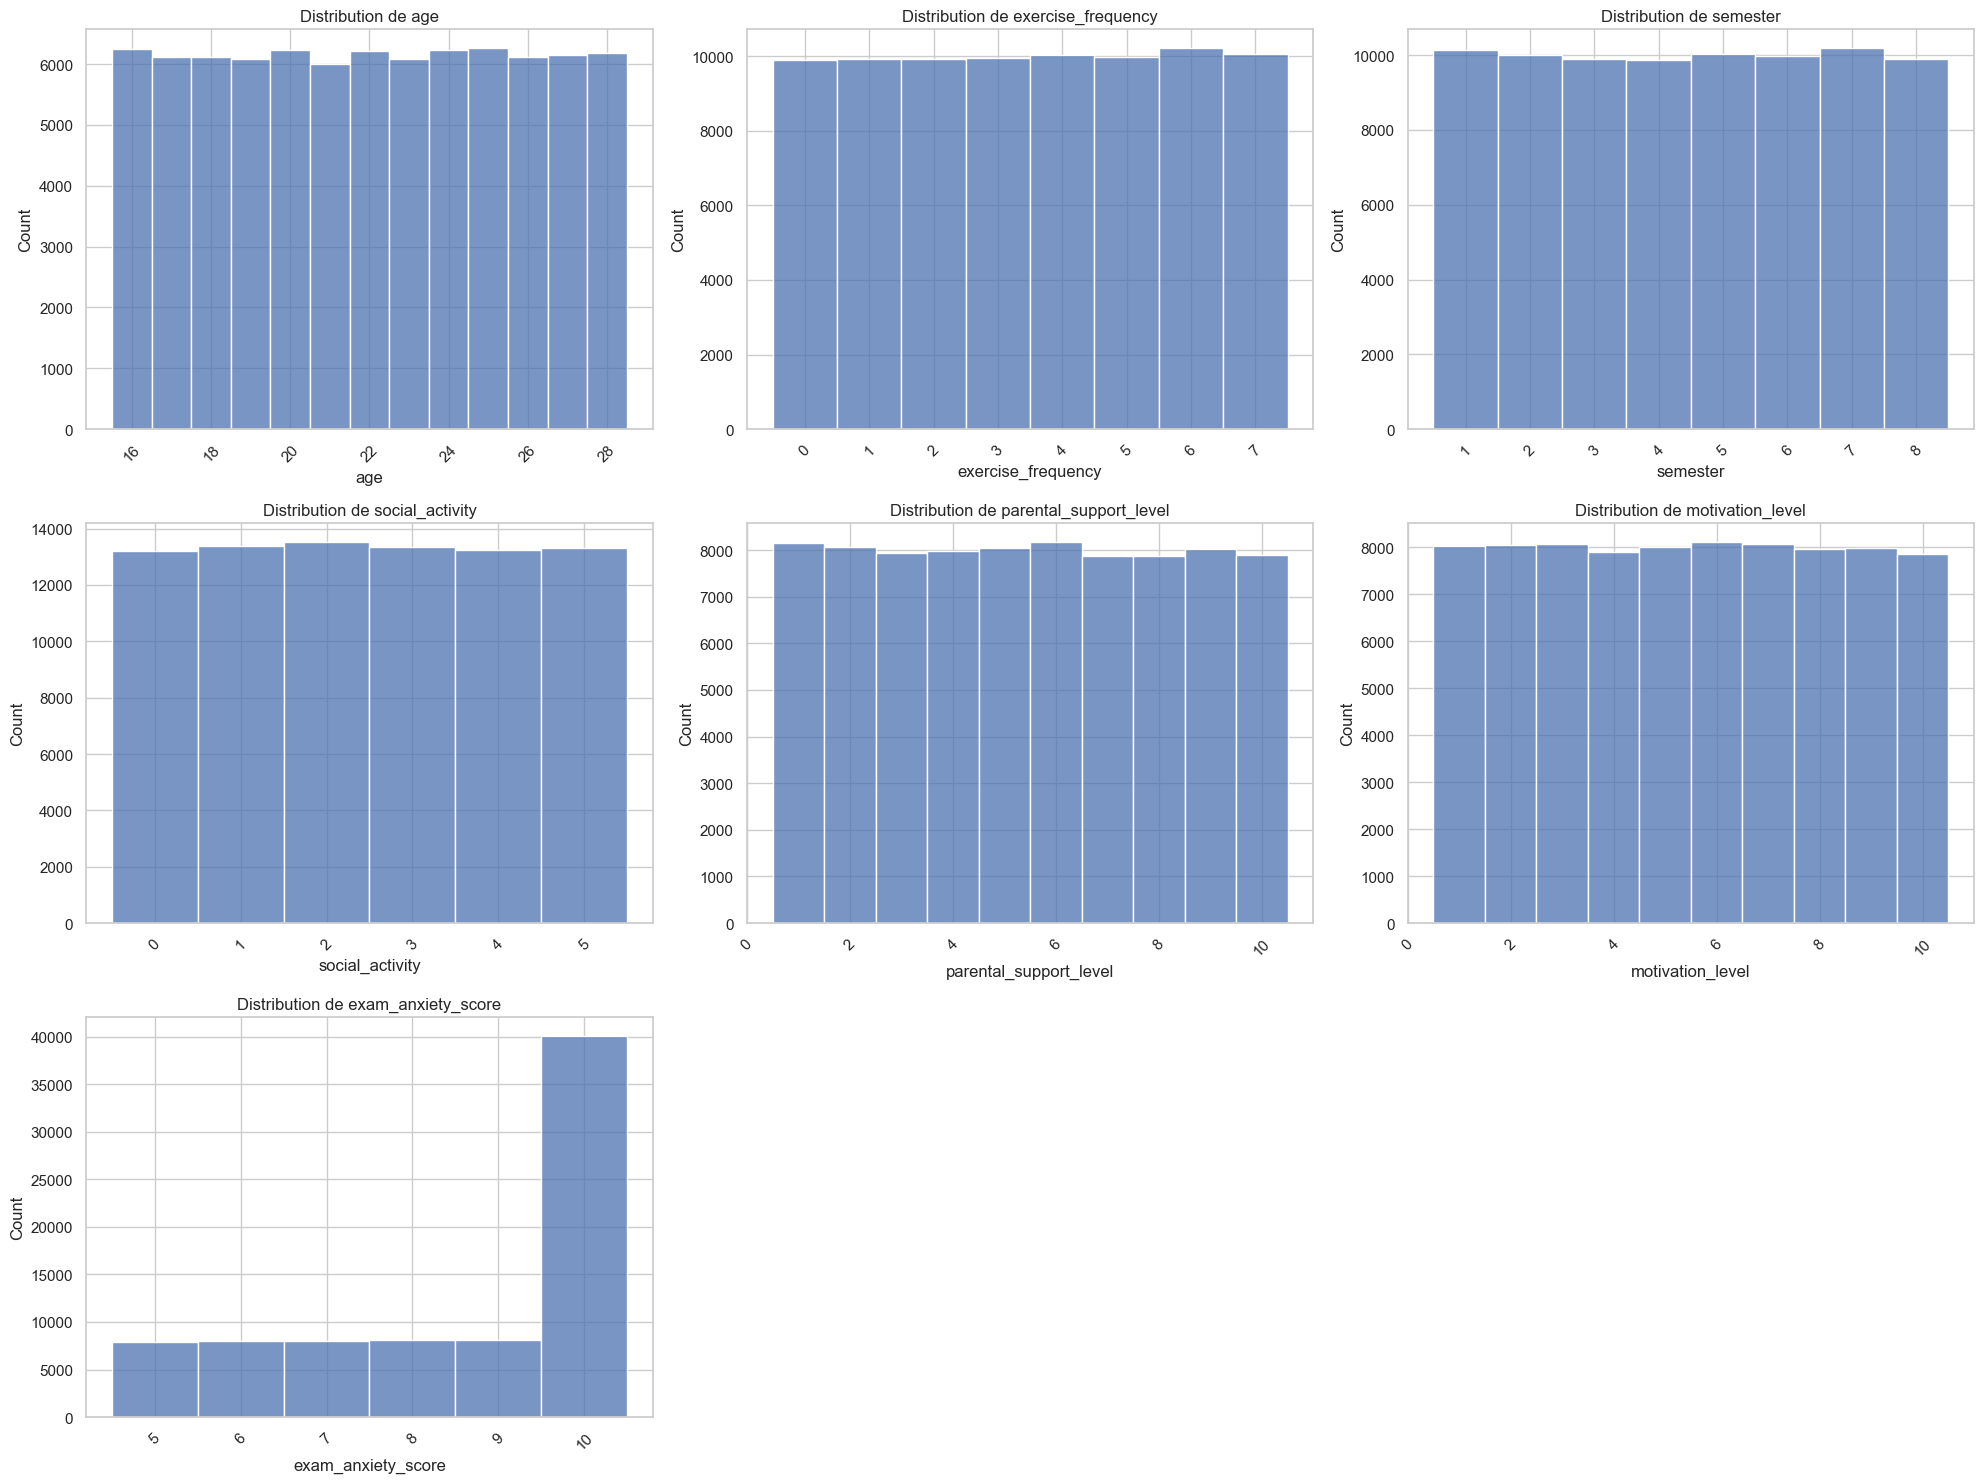

In [5]:
# 3.3 Analyse des variables quantitatives

# Sélection des variables quantitatives continues
continuous_vars = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 
                  'attendance_percentage', 'sleep_hours', 'mental_health_rating',
                  'previous_gpa', 'stress_level', 'screen_time', 'time_management_score', 
                  'exam_score', 'total_screen_time']

# Sélection des variables quantitatives discrètes
discrete_vars = ['age', 'exercise_frequency', 'semester', 'social_activity',
                'parental_support_level', 'motivation_level', 'exam_anxiety_score']

# Statistiques descriptives pour les variables continues
print("Statistiques descriptives pour les variables continues:")
stats_continuous = df[continuous_vars].describe()
stats_continuous.loc['skewness'] = df[continuous_vars].skew()
stats_continuous.loc['kurtosis'] = df[continuous_vars].kurtosis()
print(stats_continuous.round(2))

# Statistiques descriptives pour les variables discrètes
print("\nStatistiques descriptives pour les variables discrètes:")
stats_discrete = df[discrete_vars].describe()
stats_discrete.loc['skewness'] = df[discrete_vars].skew()
stats_discrete.loc['kurtosis'] = df[discrete_vars].kurtosis()
print(stats_discrete.round(2))

# Création de box plots pour les variables continues
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
df[continuous_vars].boxplot(figsize=(15, 8), rot=90)
plt.title('Box plots des variables continues')
plt.xticks(rotation=45, ha='right')

# Création de box plots pour les variables discrètes
plt.subplot(1, 2, 2)
df[discrete_vars].boxplot(figsize=(15, 8), rot=90)
plt.title('Box plots des variables discrètes')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Histogrammes pour les variables continues
plt.figure(figsize=(20, 15))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution de {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogrammes pour les variables discrètes
plt.figure(figsize=(20, 15))
for i, var in enumerate(discrete_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=var, discrete=True)
    plt.title(f'Distribution de {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


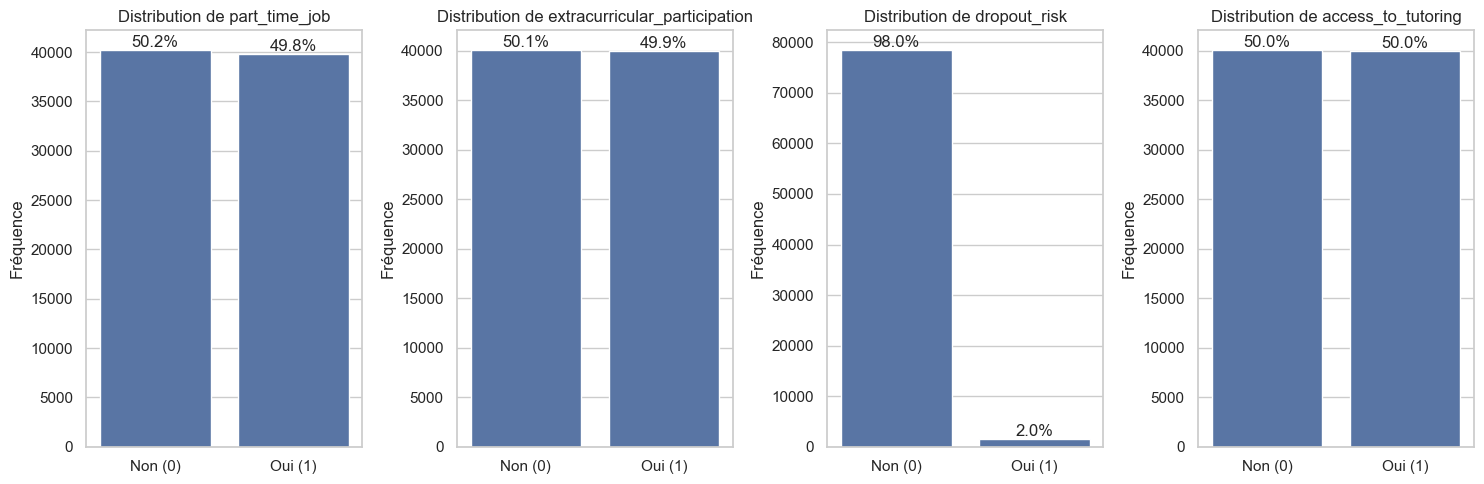


Statistiques pour les variables binaires:

part_time_job:
         Fréquence  Pourcentage
Non (0)      40195     50.24375
Oui (1)      39805     49.75625

extracurricular_participation:
         Fréquence  Pourcentage
Non (0)      40058      50.0725
Oui (1)      39942      49.9275

dropout_risk:
         Fréquence  Pourcentage
Non (0)      78418      98.0225
Oui (1)       1582       1.9775

access_to_tutoring:
         Fréquence  Pourcentage
Non (0)      40039     50.04875
Oui (1)      39961     49.95125


In [6]:
# 3.4 Analyse des variables binaires

# Liste des variables binaires
binary_vars = ['part_time_job', 'extracurricular_participation', 
               'dropout_risk', 'access_to_tutoring']

# Création d'une figure pour les diagrammes en barres
plt.figure(figsize=(15, 5))

for i, var in enumerate(binary_vars, 1):
    plt.subplot(1, 4, i)
    
    # Calcul des fréquences relatives
    freq = df[var].value_counts()
    rel_freq = df[var].value_counts(normalize=True) * 100
    
    # Création du diagramme en barres
    sns.barplot(x=['Non (0)', 'Oui (1)'], y=freq.values)
    plt.title(f'Distribution de {var}')
    plt.ylabel('Fréquence')
    
    # Ajout des pourcentages au-dessus des barres
    for j, v in enumerate(freq.values):
        plt.text(j, v, f'{rel_freq.values[j]:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Affichage des statistiques détaillées pour chaque variable binaire
print("\nStatistiques pour les variables binaires:")
for var in binary_vars:
    print(f"\n{var}:")
    freq_table = pd.DataFrame({
        'Fréquence': df[var].value_counts(),
        'Pourcentage': df[var].value_counts(normalize=True) * 100
    })
    freq_table.index = ['Non (0)', 'Oui (1)']
    print(freq_table)


## Synthèse des Observations de l'Analyse Univariée

### 1. Démographie et Caractéristiques des Étudiants

- **Distribution par Genre** : La population étudiante est très équilibrée avec environ 33.4% pour chaque catégorie (Femme, Homme, Autre).
- **Répartition par Filière** : Les six filières principales (Arts, Psychologie, Informatique, Business, Ingénierie, Biologie) sont représentées de manière quasi-équitable, chacune comptant environ 16-17% des étudiants.
- **Âge** : L'âge moyen est de 22 ans, avec une distribution s'étendant de 16 à 28 ans (écart-type de 3.75 ans).

### 2. Conditions d'Études et Mode de Vie

- **Emploi et Activités** :
  - Environ 50% des étudiants ont un emploi à temps partiel
  - La participation aux activités extrascolaires est également équilibrée (50%)
  - L'accès au tutorat est disponible pour environ 50% des étudiants

- **Environnement d'Étude** :
  - Distribution équilibrée entre les différents lieux d'étude (≈20% chacun) : dortoir, café, salle calme, groupe d'étude, bibliothèque
  - Qualité Internet : répartition équitable entre niveau bas, moyen et haut (≈33% chacun)

### 3. Performance Académique et Habitudes d'Étude

- **Temps d'Étude et Performance** :
  - Moyenne de 4.17 heures d'étude par jour (écart-type : 2 heures)
  - Taux de présence moyen de 70% (écart-type : 17.33%)
  - Score moyen aux examens de 89.14/100 (distribution négativement asymétrique, skewness : -1.03)
  - GPA moyen précédent de 3.6/4.0

- **Utilisation du Temps** :
  - Temps d'écran total moyen : 9.67 heures/jour
    - Médias sociaux : 2.5 heures/jour
    - Netflix : 2 heures/jour
  - Score moyen de gestion du temps : 5.5/10

### 4. Bien-être et Santé

- **Sommeil et Exercice** :
  - Moyenne de 7 heures de sommeil par jour
  - Fréquence d'exercice moyenne de 3.5 fois par semaine

- **Santé Mentale et Stress** :
  - Note moyenne de santé mentale : 6.8/10
  - Niveau de stress moyen : 5/10
  - Score moyen d'anxiété aux examens : 8.51/10 (relativement élevé)

### 5. Facteurs de Risque et Support

- **Risque d'Abandon** : Seulement 1.98% des étudiants présentent un risque d'abandon
- **Support Parental** : 
  - Niveau moyen de support parental : 5.48/10
  - Distribution équilibrée des niveaux d'éducation parentale
- **Situation Économique** : Distribution équitable entre les niveaux de revenus familiaux (≈33% pour chaque catégorie)

### 6. Styles d'Apprentissage

Distribution relativement équilibrée entre les quatre styles :
- Kinesthésique : 25.18%
- Visuel : 25.07%
- Lecture/Écriture : 25%
- Auditif : 24.75%

### Points Clés pour l'Analyse Bivariée à Venir

1. Explorer les corrélations entre le temps d'écran total et les performances académiques
2. Analyser l'impact des heures de sommeil sur la santé mentale et les résultats
3. Étudier la relation entre le niveau de stress et le risque d'abandon
4. Examiner l'influence du support parental et du revenu familial sur les performances